In [33]:
from nltk.corpus import wordnet as wn

In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aburgueno\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
# Conda install graphviz in anaconda prompt
# Add graphviz folder and graphviz\dot.exe in path

In [36]:
import graphviz

# HYPERNYMS AND SEMANTIC TREES

In [37]:
# All Hypernyms of several synsets with its branches

def td_semantic_tree (s_list):
    dot = graphviz.Digraph(strict=True)
    for i in s_list:
        item = i + '.n.01'
        chain = [i]
        an = wn.synset(item)

        hyp = an.hypernyms()
        while hyp != []:
            chain.append(hyp[0].name().split(".")[0])
            hyp = hyp[0].hypernyms()

        chain = list(reversed(chain)) # List reversed to make the tree top-down
        
        for i in chain:
            dot.node(i)

        for i in range(len(chain)-1):
            dot.edge(chain[i], chain[i+1])

    return(dot)

In [103]:
# All Hypernyms of several synsets with its branches

def td_semantic_tree (s_list):
    dot = graphviz.Digraph(strict=True)
    for i in s_list:
        item = i + '.n.01'
        chain = [i]
        an = wn.synset(item)

        hyp = an.hypernyms()
        while hyp != []:
            chain.append(hyp[0].name().split(".")[0])
            hyp = hyp[0].hypernyms()

        chain = list(reversed(chain)) # List reversed to make the tree top-down
        
        for i in range(len(chain)):
            if i == len(chain)-1:  
                dot.node(chain[i],style='filled',fillcolor='lightblue')
            else:
                dot.node(chain[i])

        for i in range(len(chain)-1):
            dot.edge(chain[i], chain[i+1])

    return(dot)

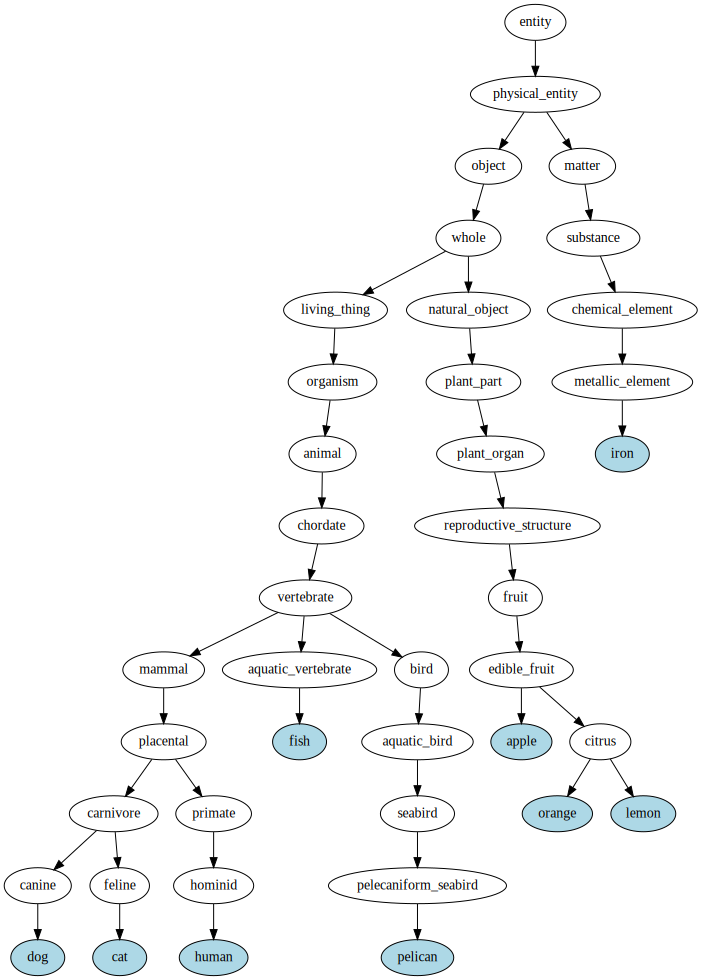

In [104]:
td_semantic_tree(['dog', 'cat', 'human', 'fish', 'apple', 'iron', 'pelican', 'orange', 'lemon'])

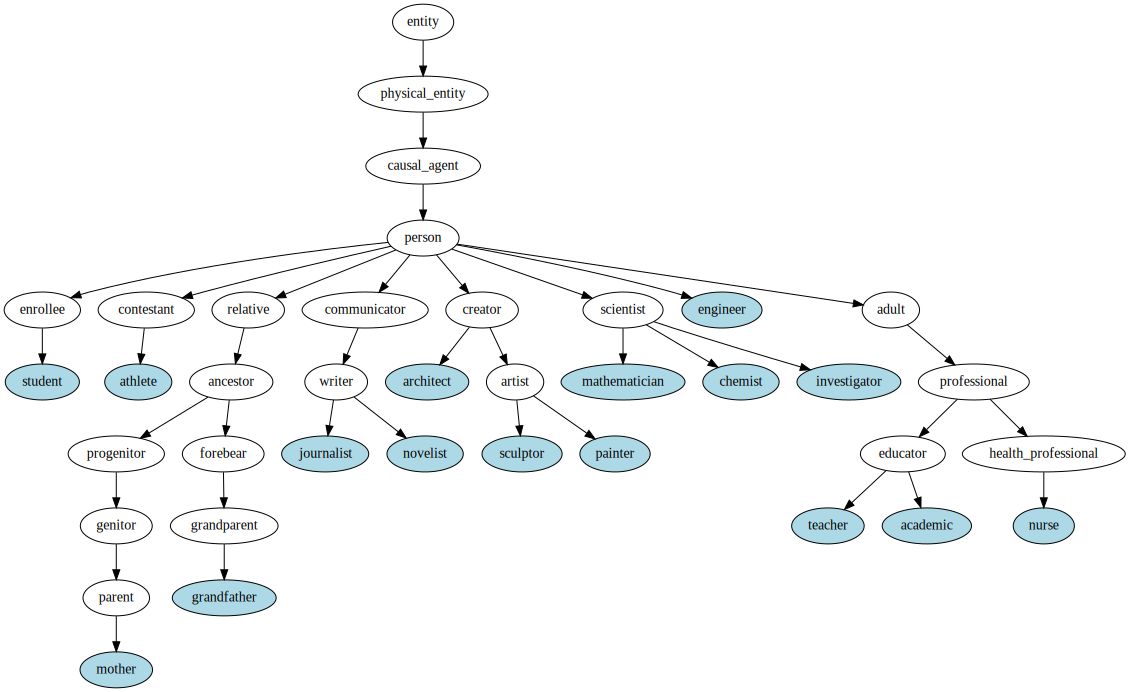

In [105]:
td_semantic_tree(['student', 'athlete', 'mother', 'journalist', 'architect', 'mathematician', 'engineer', 'grandfather', 'teacher', 'nurse', 'academic', 'chemist', 'investigator','sculptor', 'painter', 'novelist'])

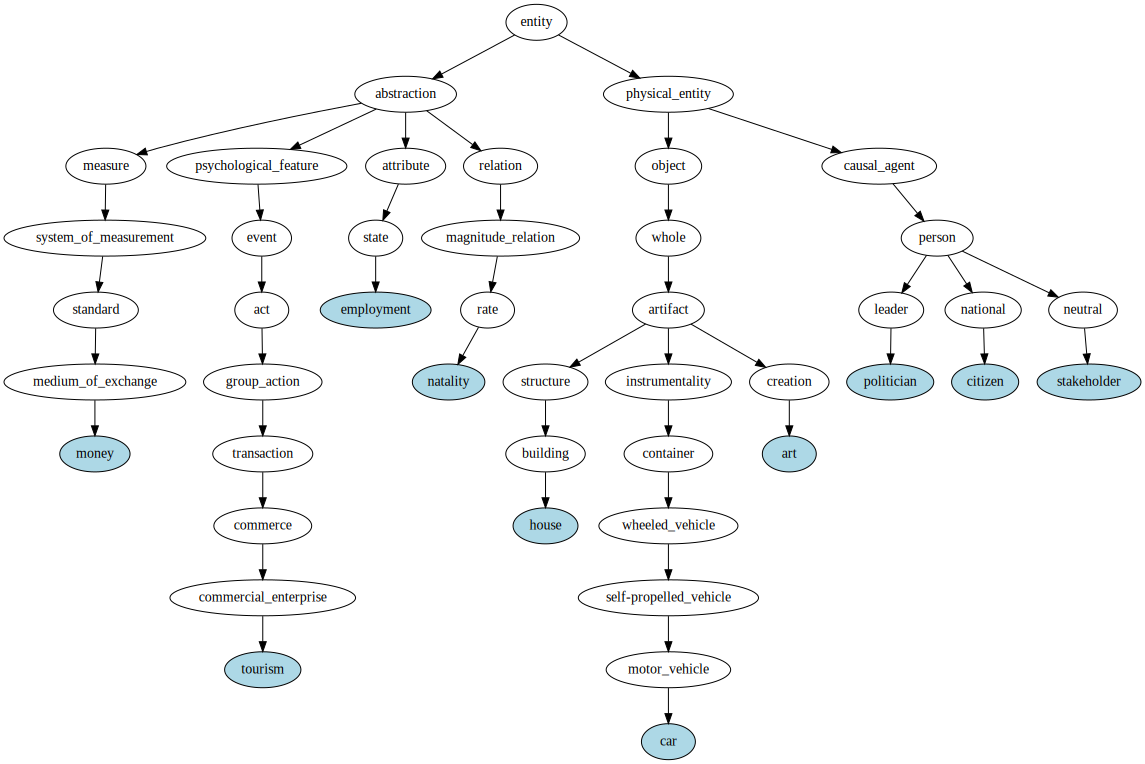

In [106]:
td_semantic_tree(['money','house','car','tourism','art','employment','natality','politician','citizen','stakeholder'])

# PATH SIMILARITY IN SEMANTIC TREE

In [41]:
# Path similarity = 1/(edges+1)

dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')

print(dog.path_similarity(cat))

0.2


In [42]:
dog = wn.synset('dog.n.01')
pelican = wn.synset('pelican.n.01')

print(dog.path_similarity(pelican))

0.1


In [43]:
# Other types of similarity
print(dog.lch_similarity(cat))
print(dog.lch_similarity(pelican))

2.0281482472922856
1.3350010667323402


In [44]:
print(dog.wup_similarity(cat))
print(dog.wup_similarity(pelican))

0.8571428571428571
0.6666666666666666


# HYPONYM CLOUDS

In [45]:
dog.hyponyms()

[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01')]

In [107]:
def hyponyms (s_list):
    dot = graphviz.Digraph(engine='fdp',strict=True) #others are circo, neato, twopi, dot...
    for word in s_list:
        item = word + '.n.01'
        chain = []
        
        an = wn.synset(item)
        hyp = an.hyponyms()
        
        for i in range(len(hyp)):
            chain.append(hyp[i].name().split(".")[0])
        
        dot.node(word,style='filled',fillcolor='lightblue')

        for i in chain:
            dot.node(i)

        for i in range(len(chain)):
            dot.edge(word, chain[i]) 

    return(dot)

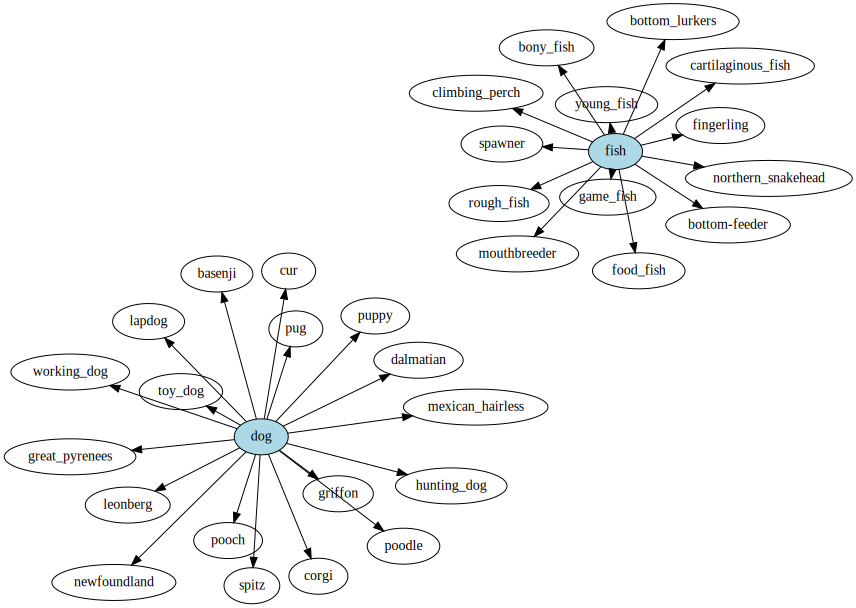

In [108]:
hyponyms(['dog','fish'])

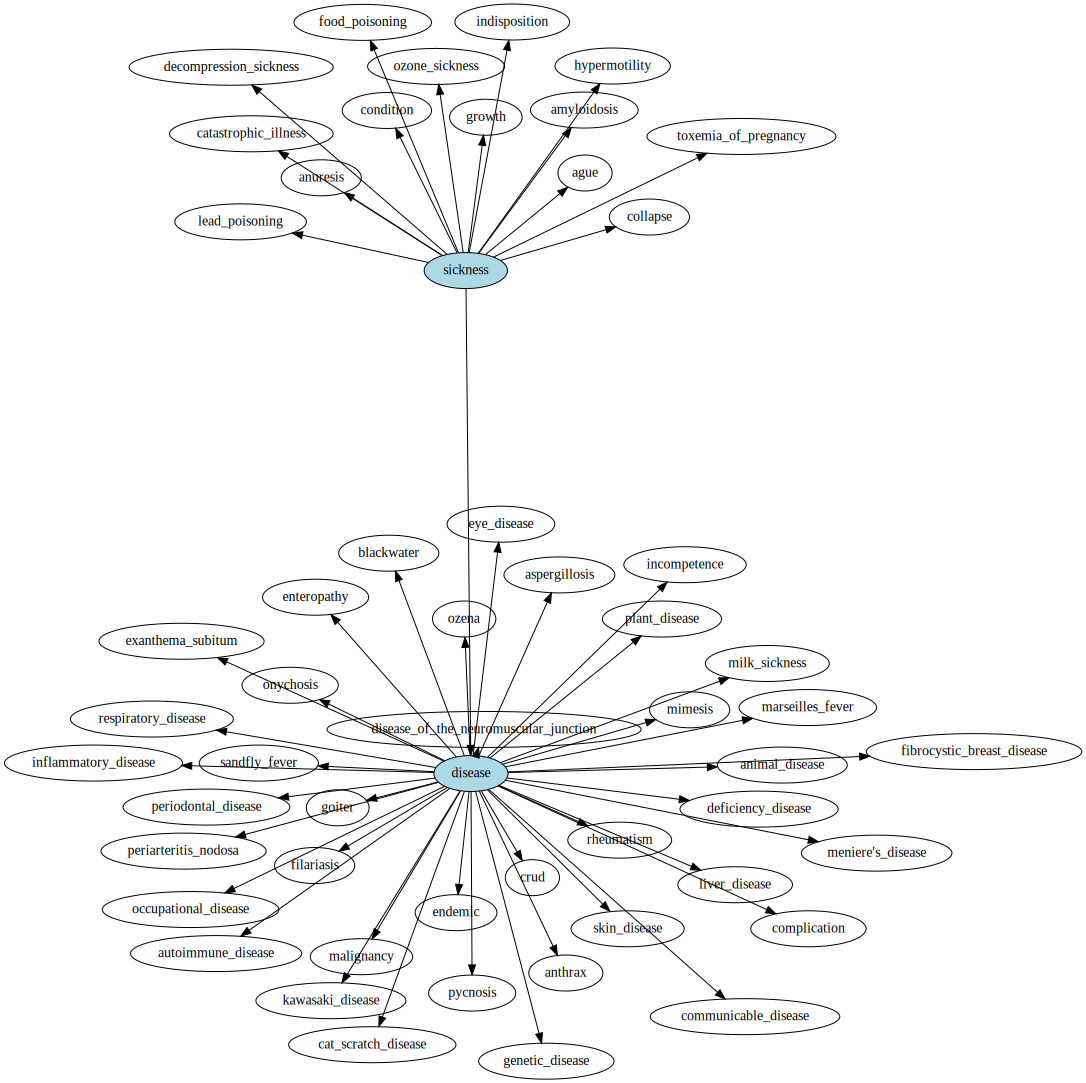

In [109]:
hyponyms(['sickness','disease'])

# INCLUDING LONG SENTENCES

In [54]:
#Import libraries
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from string import punctuation

#Load NLP language core
nlp = spacy.load('en_core_web_lg') # 'es_core_news_lg'

#Avoid pandas copy warnings
pd.options.mode.chained_assignment = None

In [77]:
sentence = 'A big volcano on La Palma, one of Spain’s Canary Islands, erupted today, sending lava shooting into the air and flowing across the streets.'

result = []
pos_tag = ['NOUN'] 
doc = nlp(sentence.lower()) 
for token in doc:

    if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
        continue

    if(token.pos_ in pos_tag):
        result.append(token.lemma_) # token.text substituted to token.lemma_ to avoid plurals

print (result)

['volcano', 'canary', 'island', 'today', 'lava', 'shooting', 'air', 'street']


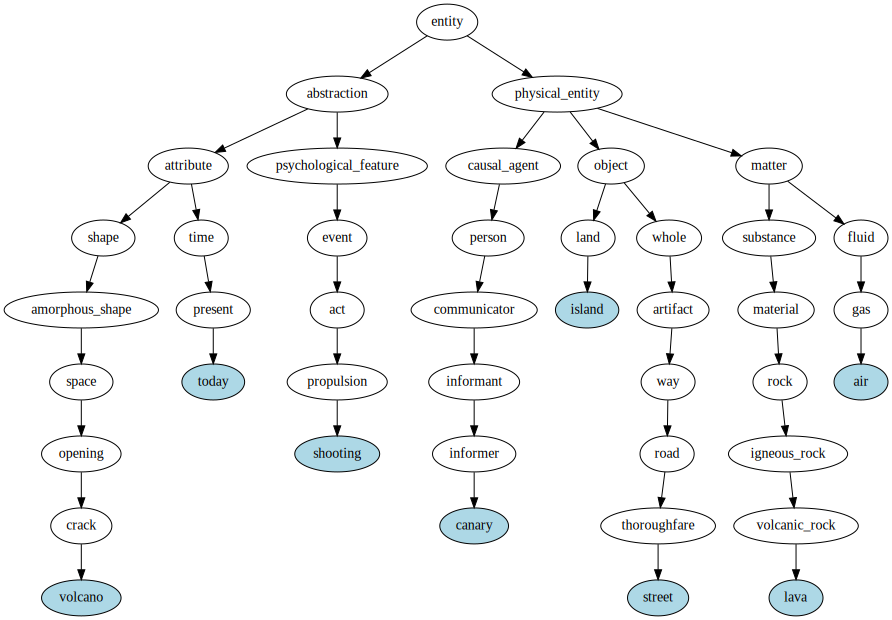

In [110]:
td_semantic_tree(result)

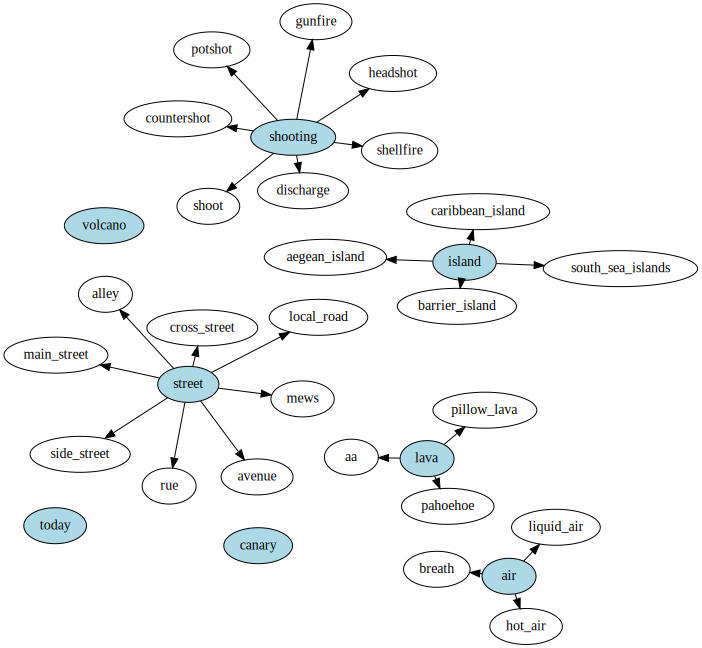

In [111]:
hyponyms(result)

# INCLUDING SEVERAL NEWS

In [112]:
news = [
"Scientists say a volcano in Spain's Canary Islands has started to erupt after a week of building seismic activity. Spanish state broadcaster TVE shows a plume of black smoke shooting up over the Atlantic Ocean island of La Palma.",
"A big volcano on La Palma, one of Spain’s Canary Islands, erupted today, sending lava shooting into the air and flowing across the streets.",
"A volcano on Spain’s Atlantic Ocean island of La Palma erupted Sunday after a weeklong buildup of seismic activity, prompting authorities to evacuate thousands as lava flows destroyed isolated houses and threatened to reach the coast. New eruptions continued into the night.",
"A volcano on La Palma, one of Spain's Canary Islands, erupted on Sunday, spewing lava. The Canary Islands Volcanology Institute said this was the first eruption on La Palma in 50 years."]

In [113]:
result = []
for sentence in news:

    pos_tag = ['NOUN'] 
    doc = nlp(sentence.lower()) 
    for token in doc:

        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue

        if(token.pos_ in pos_tag):
            result.append(token.lemma_) # token.text substituted to token.lemma_ to avoid plurals

print (result)

['scientist', 'volcano', 'canary', 'island', 'week', 'activity', 'state', 'plume', 'smoke', 'volcano', 'canary', 'island', 'today', 'lava', 'shooting', 'air', 'street', 'volcano', 'buildup', 'activity', 'authority', 'thousand', 'lava', 'flow', 'house', 'coast', 'eruption', 'night', 'volcano', 'canary', 'island', 'lava', 'canary', 'island', 'eruption', 'year']


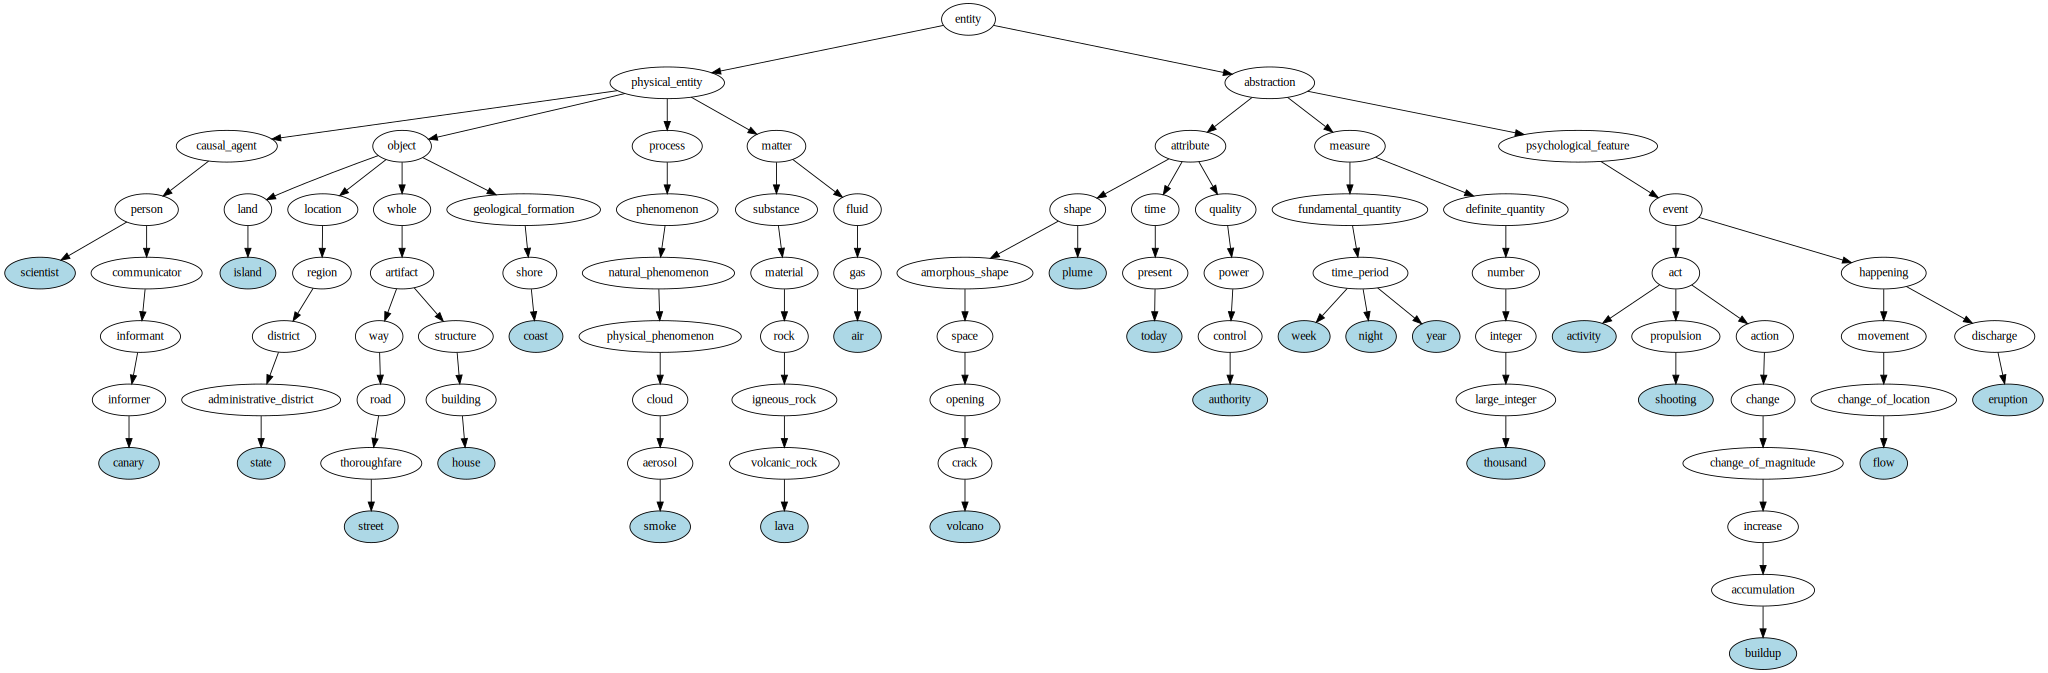

In [114]:
td_semantic_tree(result)

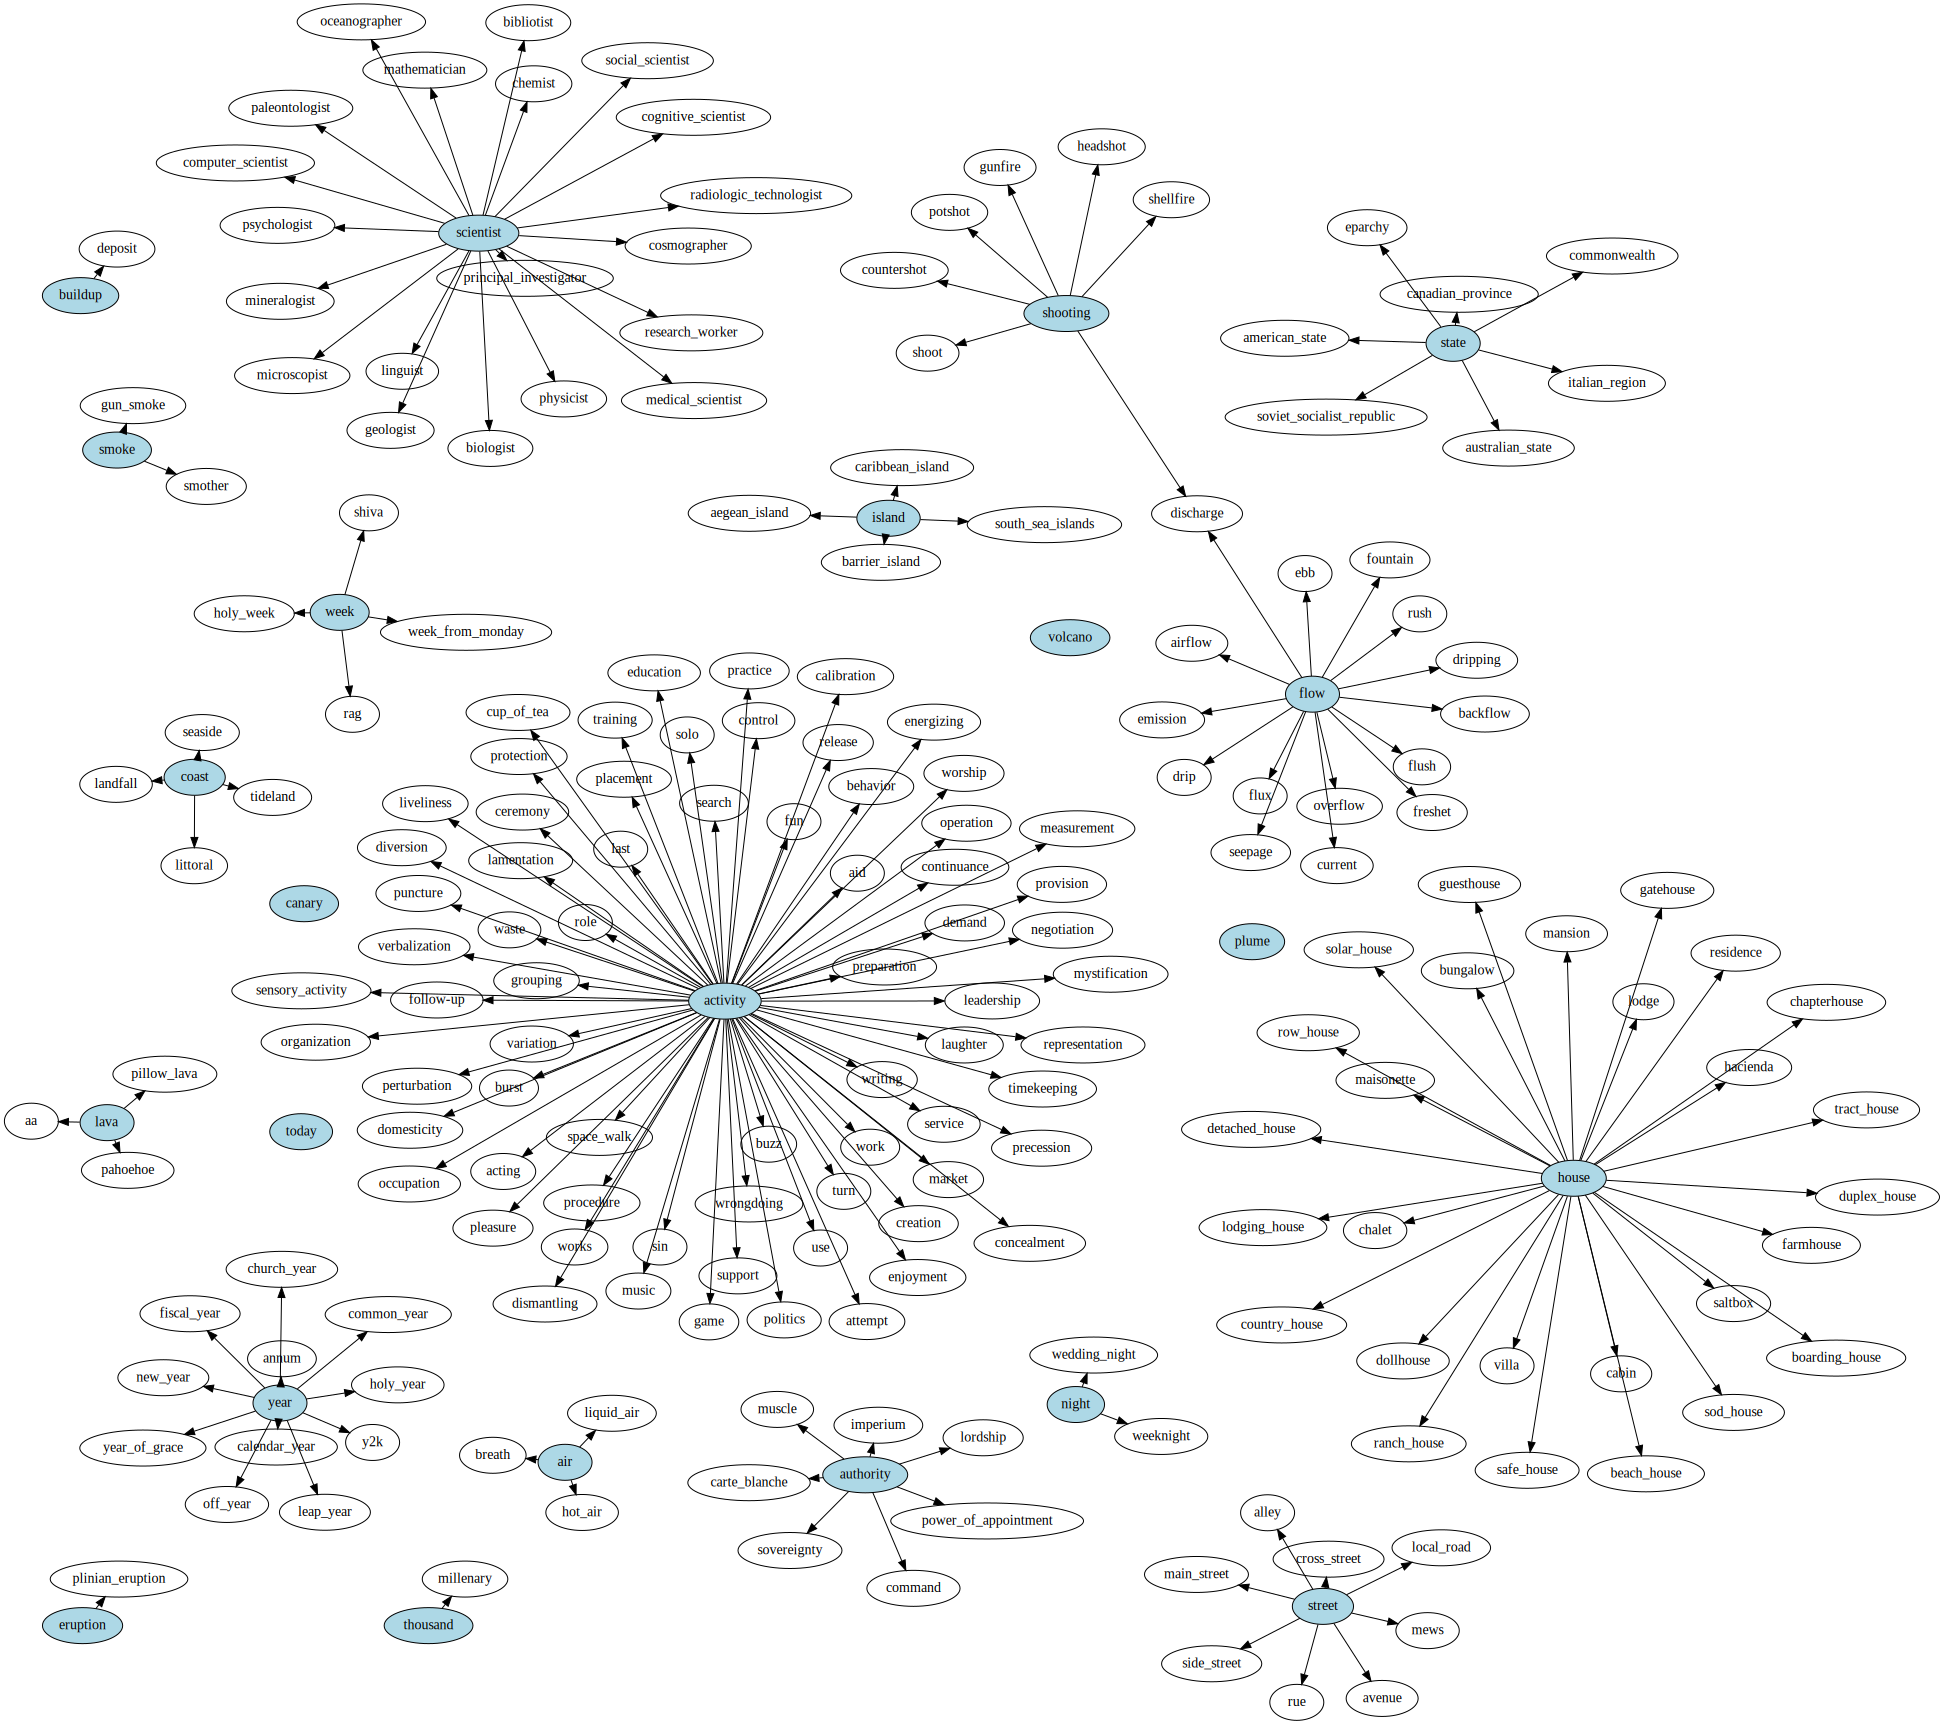

In [115]:
hyponyms(result)